**CELIK Baran 141 - Statistics & modeling - Lab session n°2**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import fetch_olivetti_faces

# Introduction

In this report, we perform PCA on two datasets: the Olivetti faces dataset and fluid dynamics snapshots. PCA is a powerful dimensionality reduction technique that transforms data into a set of linearly uncorrelated variables, called principal components, ordered by the amount of variance they explain. The goal of this analysis is to explore how PCA can be used to compress and reconstruct high-dimensional data while retaining essential features. We will also discuss PCA’s limitations, such as its inability to reconstruct out-of-distribution data, and its effectiveness in capturing underlying patterns, particularly in images and fluid flow dynamics.

The report is structured as follows:

- Dataset overview: we begin by examining the Olivetti faces dataset, visualizing the data, and exploring intra-person variability.

- PCA on faces: we implement PCA on the face images, visualize the eigenvalue spectrum, and demonstrate how PCA can be used for image compression and reconstruction.

- PCA on fluid dynamics: finally, we apply PCA to fluid flow data, using it to capture the dominant spatial structures in fluid dynamics.



# Dataset of faces

## Dataset overview

The Olivetti faces dataset contains 400 grayscale images, each of size 64x64 pixels, representing 40 different individuals. For each individual, 10 images are provided, with variations in lighting, pose, and expression. We begin by visualizing one image per individual to get an overview of the diversity within the dataset.

In [8]:
# download the face images
faces = datasets.fetch_olivetti_faces()
X = faces.data
targets = faces.target

#  each row is an image of size 64 x 64 = 4096 numbers
print("Data shape:", X.shape)
print("Number of individuals:", len(np.unique(targets)))

Data shape: (400, 4096)
Number of individuals: 40


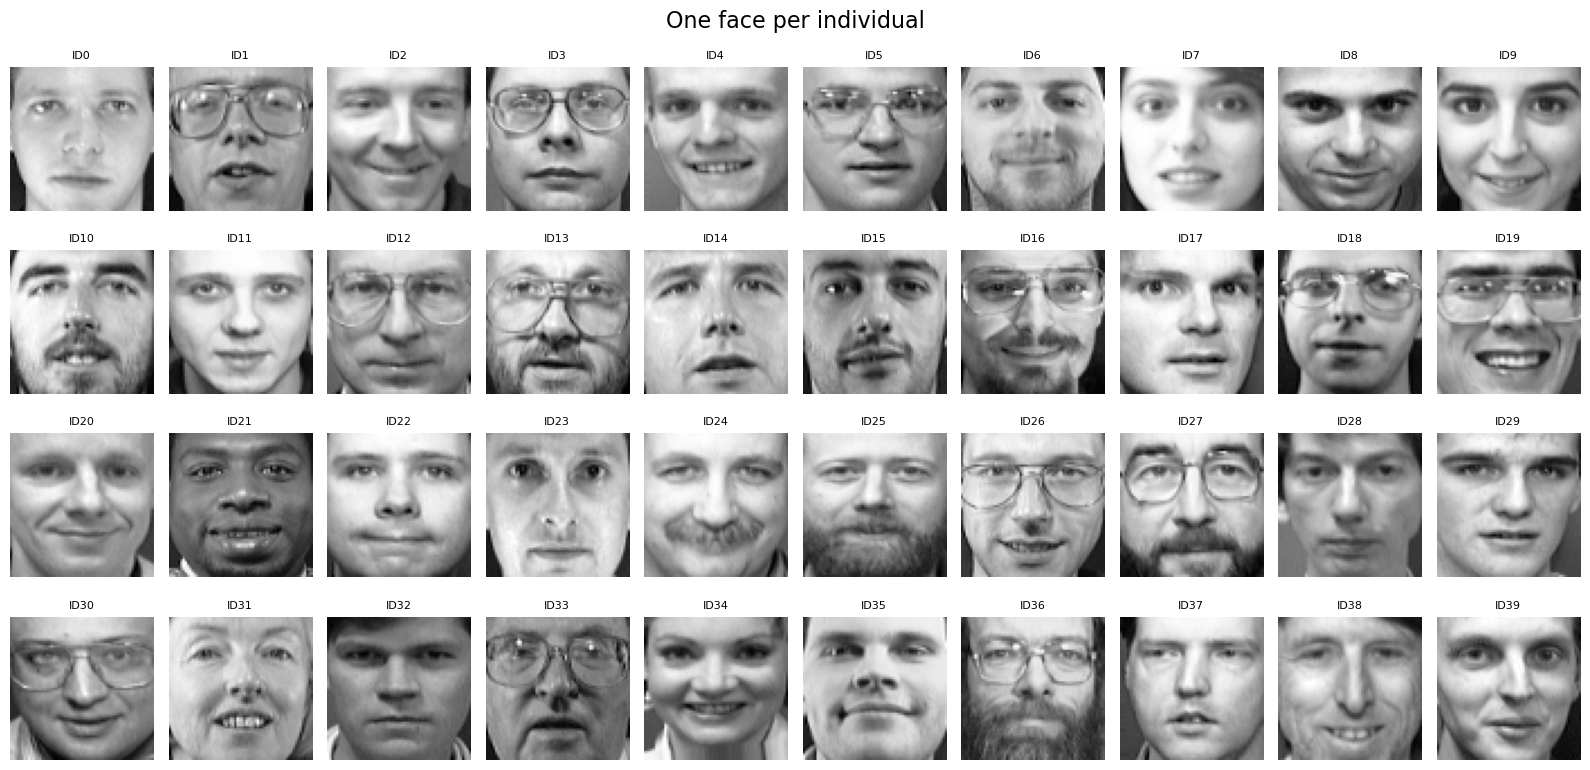

In [10]:
# visualize one image per individual
plt.figure(figsize=(16, 8))
for person_id in np.unique(targets):
    plt.subplot(4, 10, person_id + 1)
    plt.imshow(X[person_id * 10].reshape(64, 64), cmap='gray')
    plt.title(f"ID{person_id}", fontsize=8)
    plt.axis('off')
plt.suptitle("One face per individual", fontsize=16)
plt.tight_layout()
plt.show()

## Intra-person variability

Next, we visualize all 10 images for person ID 25 to observe the intra-person variability, including changes in expression, lighting, and pose. These variations will be captured by PCA as it looks for the principal components that best explain the variance in the data.

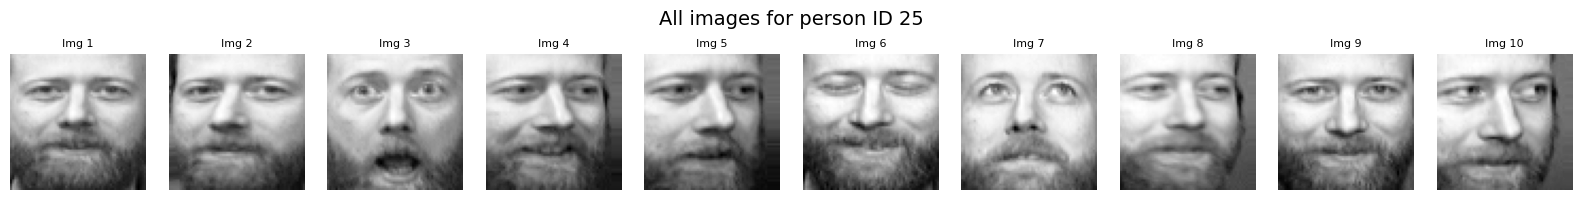

In [13]:
# visualize all 10 images for one person
person = 25
plt.figure(figsize=(16, 2))
for i in range(10):
    img_index = person * 10 + i
    plt.subplot(1, 10, i + 1)
    plt.imshow(X[img_index].reshape(64, 64), cmap='gray')
    plt.title(f"Img {i+1}", fontsize=8)
    plt.axis('off')
plt.suptitle(f"All images for person ID {person}", fontsize=14)
plt.tight_layout()
plt.show()

Each image in the dataset is labeled with the individual’s identity. The target array indicates that each individual is represented by 10 images, ensuring a balanced dataset for analysis.

In [16]:
# look at the id repartition
print(targets)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

# PCA on faces

## PCA implementation

PCA works by finding the directions (principal components) that maximize the variance in the data. The key steps involve centering the data, computing the covariance matrix, and then performing eigenvalue decomposition to extract the eigenvectors (principal components) and eigenvalues (the amount of variance explained by each component).

The data is centered by subtracting the mean face, and the covariance matrix captures the relationships between different features (pixels in the images). PCA will use this covariance matrix to find the principal components.

In [22]:
N, d = X.shape
xb = X.mean(axis=0)
print("Mean shape:", xb.shape)
Xc = X - xb
print("Centered data shape:", Xc.shape)

# covariance matrix
S = Xc.T @ Xc / (N - 1)
print("Covariance matrix shape:", S.shape)

Mean shape: (4096,)
Centered data shape: (400, 4096)
Covariance matrix shape: (4096, 4096)


In [24]:
# eigen decomposition of the covariance matrix
lambdas, V = np.linalg.eig(S)
print("Eigenvalues shape:", lambdas.shape)
print("Eigenvectors shape:", V.shape)

Eigenvalues shape: (4096,)
Eigenvectors shape: (4096, 4096)


In [25]:
# sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(lambdas)[::-1]
lambdas = lambdas[sorted_indices]
V = V[:, sorted_indices]

To visualize what the principal components capture, we reshaped the first eigenvectors into 64×64 images. These eigenfaces show dominant patterns of variation, such as lighting and facial structure. The figure below shows the first five.

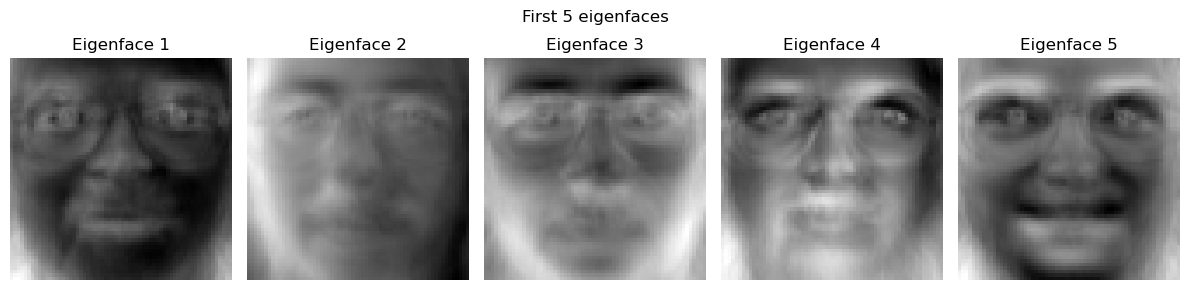

In [27]:
# visualize the first few eigenfaces
plt.figure(figsize=(12, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(V[:, i].reshape(64, 64), cmap='gray')
    plt.title(f"Eigenface {i+1}")
    plt.axis('off')
plt.suptitle("First 5 eigenfaces")
plt.tight_layout()
plt.show()

## Visualize eigenvalue spectrum

To assess how much variance is explained by each principal component, we plot the eigenvalue spectrum, focusing on the top 20 eigenvalues.

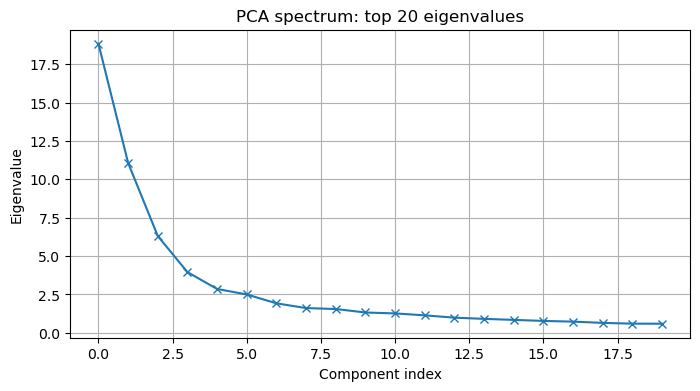

In [29]:
# plot spectrum (top 20 eigenvalues)
plt.figure(figsize=(8, 4))
plt.plot(lambdas[:20],'-x')
plt.title("PCA spectrum: top 20 eigenvalues")
plt.xlabel("Component index")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.show()

The eigenvalue spectrum shows that the first few principal components capture the majority of the variance in the data. This validates the use of dimensionality reduction without significant information loss.

## Image compression & reconstruction with PCA

We can use the first k principal components to compress an image by projecting it onto the subspace spanned by the top k components. As k increases, the quality of the reconstruction improves.

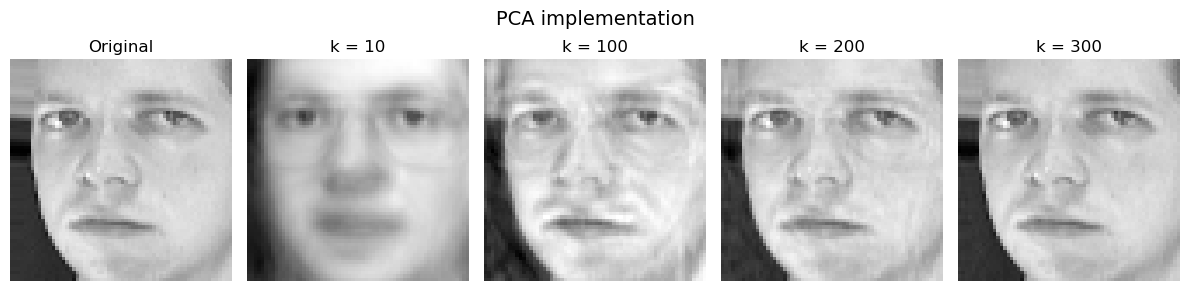

In [32]:
# reconstruct a face using first k components
image_id = 5
original = X[image_id]
Xc_image = original - xb
components_list = [10, 100, 200, 300]

plt.figure(figsize=(12, 3))
plt.subplot(1, len(components_list) + 1, 1)
plt.imshow(original.reshape(64, 64), cmap='gray')
plt.title("Original")
plt.axis('off')

for i, k in enumerate(components_list):
    V_k = V[:, :k]  # top k eigenvectors
    coeffs = Xc_image @ V_k  # project
    recon = coeffs @ V_k.T + xb  # reconstruct

    plt.subplot(1, len(components_list) + 1, i + 2)
    plt.imshow(recon.reshape(64, 64), cmap='gray')
    plt.title(f"k = {k}")
    plt.axis('off')

plt.suptitle("PCA implementation", fontsize=14)
plt.tight_layout()
plt.show()

The reconstructed images become progressively sharper as more principal components are used.

We calculated the compression ratio achieved by projecting the images onto a reduced number of components, demonstrating that significant dimensionality reduction is possible with minimal visual degradation.



In [34]:
original_size = X[0].size  # 4096
print(f"Compression ratio (k=10): {10/original_size:%}")
print(f"Compression ratio (k=100): {100/original_size:%}")
print(f"Compression ratio (k=200): {200/original_size:%}")
print(f"Compression ratio (k=300): {300/original_size:%}")

Compression ratio (k=10): 0.244141%
Compression ratio (k=100): 2.441406%
Compression ratio (k=200): 4.882812%
Compression ratio (k=300): 7.324219%


Using only 200 components gives a compression ratio of 4.88%, with good visual quality.

## Cumulative explained variance 
To better understand how the variance is distributed across the principal components, we computed the cumulative explained variance. The resulting plot shows that the first components account for a significant proportion of the total variance.

Number of components to explain 90% of variance: 66
Number of components to explain 95% of variance: 123


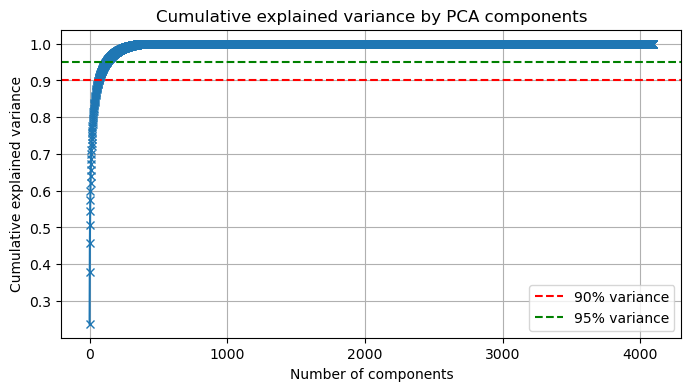

In [37]:
# normalize eigenvalues to get explained variance ratio
explained_variance_ratio = lambdas / np.sum(lambdas)
cumulative_variance = np.cumsum(explained_variance_ratio)

# print how many components are needed to reach 90% and 95%
n_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to explain 90% of variance: {n_90}")
print(f"Number of components to explain 95% of variance: {n_95}")

# plot
plt.figure(figsize=(8, 4))
plt.plot(cumulative_variance, '-x')
plt.axhline(0.90, color='r', linestyle='--', label='90% variance')
plt.axhline(0.95, color='g', linestyle='--', label='95% variance')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Cumulative explained variance by PCA components")
plt.grid(True)
plt.legend()
plt.show()

In particular, we observe that:

- The first 66 components explain 90% of the total variance

- The first 123 components explain 95% of the total variance

This result confirms the effectiveness of PCA in reducing dimensionality: we can represent the original 4096-dimensional data using 3% of the components (123 out of 4096) while retaining most of the relevant information. This justifies using a reduced number of components (100 or 200) for image compression and reconstruction without a significant loss in quality.

## Out-of-distribution reconstruction 

PCA can be used to reconstruct images from the training set, but it struggles to reconstruct images from an entirely different distribution. For example, we try to apply PCA to reconstruct a dog image, which was not part of the training data.

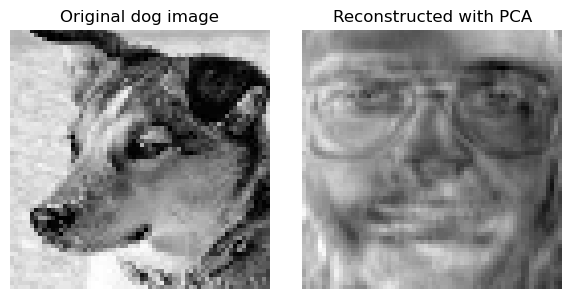

In [40]:
dog = np.load('dog.npy')

dog_flat = dog.flatten()
Xc_dog = dog_flat - xb
coeffs = Xc_dog @ V[:, :100]
dog_recon = coeffs @ V[:, :100].T + xb

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(dog, cmap='gray')
plt.title("Original dog image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dog_recon.reshape(64, 64), cmap='gray')
plt.title("Reconstructed with PCA")
plt.axis('off')
plt.tight_layout()
plt.show()

While PCA attempts to reconstruct the image, it does so poorly because the dog’s features are not captured in the principal components learned from faces. This highlights a limitation of PCA: it cannot handle out-of-distribution data.

## Apply PCA to a simulated 'new' face

A new face is created by adding noise to the average face. PCA still captures the structure well when reconstructing this image, indicating that it generalizes to small perturbations of the training data.

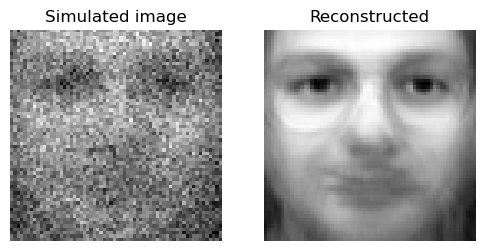

In [43]:
# simulate a new image
avg_face = xb
noisy_face = avg_face + 0.1 * np.random.randn(d)
Xc_noisy = noisy_face - xb
coeffs = Xc_noisy @ V[:, :100]
recon = coeffs @ V[:, :100].T + xb

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(noisy_face.reshape(64, 64), cmap='gray')
plt.title("Simulated image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(recon.reshape(64, 64), cmap='gray')
plt.title("Reconstructed")
plt.axis('off')
plt.show()

# PCA on fluid dynamics snapshots

In this section, we apply PCA (via SVD) to a set of fluid flow snapshots. The top modes capture dominant spatial structures in the flow.

The fluid flow data consists of multiple snapshots, each representing a specific state of the fluid dynamics at a given time. We begin by loading the flow data and reshaping it so that each snapshot can be treated as a vector in a high-dimensional space.

In [45]:
# load the flow data
flow_data = np.load('flow_cylinder.npy')
print("Flow data shape:", flow_data.shape)
n_snapshots, h, w = flow_data.shape
X_flow = np.array([frame.flatten() for frame in flow_data])
Xb_flow = X_flow.mean(axis=0)
Xc_flow = X_flow - Xb_flow

Flow data shape: (151, 384, 199)


By applying SVD, we decompose the centered data matrix into three components: the left singular vectors, the singular values, and the right singular vectors. 

In [47]:
# apply SVD
U, s, Vt = np.linalg.svd(Xc_flow, full_matrices=False)
lambdas_flow = (s ** 2) / (X_flow.shape[0] - 1)
indices = np.argsort(lambdas_flow)[::-1]
lambdas_flow = lambdas_flow[indices]

The singular values s are squared to obtain the eigenvalues lambdas_flow, which represent the variance explained by each principal mode. We then sort the eigenvalues in descending order, so the first few components correspond to the most significant modes in the fluid flow.

## Visualize the eigenvalue spectrum

The eigenvalue spectrum indicates how much variance each mode explains. The first few modes capture the majority of the variance, suggesting that a reduced number of modes will likely suffice to represent the dominant features of the fluid flow.

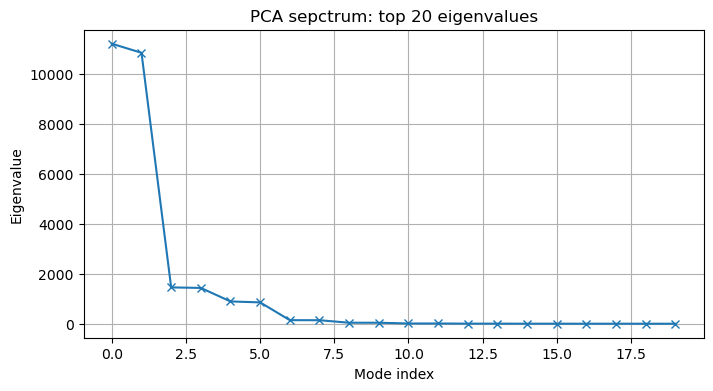

In [50]:
# plot eigenvalue spectrum
plt.figure(figsize=(8, 4))
plt.plot(lambdas_flow[:20],'-x')
plt.title("PCA sepctrum: top 20 eigenvalues")
plt.xlabel("Mode index")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.show()

## Interpreting Flow Modes

Next, we visualize the first few principal modes to understand the spatial structures in the fluid flow data. These modes represent the dominant patterns of variation across the snapshots, such as the direction and strength of the flow.

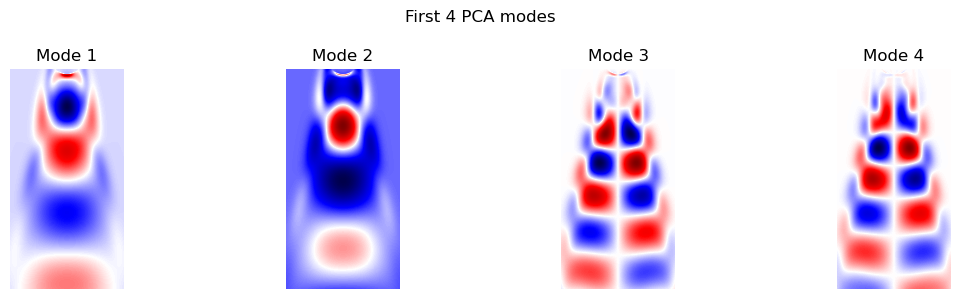

In [52]:
# visualize first 4 PCA modes
plt.figure(figsize=(12, 3))
for i in range(4):
    mode = Vt[i].reshape(h, w)
    plt.subplot(1, 4, i + 1)
    plt.imshow(mode, cmap='seismic')
    plt.title(f"Mode {i+1}")
    plt.axis('off')
plt.suptitle("First 4 PCA modes")
plt.tight_layout()
plt.show()

## Dimensionality reduction in fluid dynamics

PCA enables us to reduce the dimensionality of fluid flow data while preserving the dominant spatial structures. Each snapshot, originally represented as a high-dimensional vector, can be approximated using a small number of principal modes.

To illustrate this, we reconstructed a fluid flow snapshot using only the first k=10 principal components.

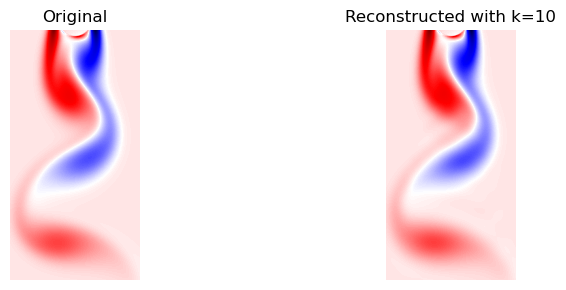

In [77]:
# reconstruct first snapshot using k modes
k = 10
snapshot = Xc_flow[0]
Vk_flow = Vt[:k]
coeffs = snapshot @ Vk_flow.T
recon = coeffs @ Vk_flow
recon_image = (recon + Xb_flow).reshape(h, w)

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.imshow(flow_data[0], cmap='seismic')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(recon_image, cmap='seismic')
plt.title(f"Reconstructed with k={k}")
plt.axis('off')
plt.tight_layout()
plt.show()

# Conclusion

In this report, we applied PCA to two distinct datasets: human face images and fluid dynamics snapshots. This method enabled us to reduce the dimensionality of high-dimensional data while preserving its essential structure.

- For the face dataset, PCA proved effective in compressing and reconstructing images using a reduced number of principal components. We observed that the first few components captured most of the variance, allowing for significant dimensionality reduction without major loss of visual information. However, attempting to reconstruct an out-of-distribution image (a dog) revealed a limitation of PCA: it does not generalize well beyond the training data distribution.

- For the fluid dynamics data, PCA helped identify dominant spatial structures through its principal modes. Dimensionality reduction facilitated both visualization and interpretation of the underlying dynamic patterns in the flow.

Finally, PCA is a powerful tool for analyzing complex data, especially when dimensionality poses a challenge. However, its performance depends heavily on the nature and representativeness of the input data, and care must be taken when applying it to unfamiliar or out-of-distribution scenarios.